In [13]:
# See http://www.bebec.eu/Downloads/BeBeC2014/Papers/BeBeC-2014-01.pdf for source info.
import numpy as np
from matplotlib import pyplot as plt
from cmath import sqrt
π = np.pi
tol = 1e-14

In [14]:
plt.rcParams["figure.dpi"] = 300

# Generalized Functional BeamForming

In [15]:
def f(func,C) :
    '''
    If C = UΣU.T, then f(C) = Uf(Σ)U.T = U*diag(func(σ_1),...,func(σ_2))*U.T
    
    Inputs :
        func - Callable scalar function
        C    - Cross Spectral Matrix of a system
        
    Output :
        f(C) as defined in description
    '''
    eigv, U = np.linalg.eig(C)
    eigv = [eig if abs(eig) > tol else 0 for eig in eigv]
    f_eigs = [func(eig) for eig in eigv]
    return U@np.diag(f_eigs)@U.T

def calc_coeffs(θ,N,r,λ) :
    '''
    Calculates the coefficients of the beam equation
    
    Inputs:
        θ (rad) - angle off from orthogonal to array
        N (int) - number of antenna +1
    
    Output:
        a_k for the beam form equation Σ_1^N <a_k(θ), x_k> where x_k is the volatge response of antenna k
        NOTE: This vector is normalized (why? I don't know)
    '''
    ϕ = π*np.sin(θ) # Why is this negative?
    bs = np.zeros(N)
    for k in range(N) :
        #ϕ = 2*π*dist(k,θ,r,N,λ)/λ 
        bs[k] = np.exp(ϕ*k*1j)
    return bs/np.linalg.norm(bs)

In [16]:
# Trying to use the information in http://www.bebec.eu/Downloads/BeBeC2014/Papers/BeBeC-2014-01.pdf
N = 7                                                                  # Number of antenna
ν = 5                                                                  # ν in the functional beamforming algorithm
λ = 1                                                                  # Wavelength
num_points = 100000
practically_zero_dB = 0.05
θ = np.linspace(0,2*π,num_points)
beams = [π/3]                                                        # Desired azmith angles
s_k = [10]                                                             # Powers for different angles
ak = [calc_coeffs(beams[i],N,s_k[i],λ) for i in range(len(beams))]
g_k = [np.array(ak[i]).reshape(1,N) for i in range(len(ak))]
C = sum([s_k[i]*(np.dot(g_k[i].T,g_k[i])) for i in range(len(s_k))])   # Cross Spectral Matrix
func = lambda x : x**(1/ν)
b1 = lambda g : abs(g.T@C@g)
b2 = lambda g : abs(g.T@f(func,C)@g)**ν

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: ComplexWarning: Casting complex values to real discards the imaginary part


15.82% of angles are less than or equal to 0.05 in beam 1.
77.95% of angles are less than or equal to 0.05 in beam 2.


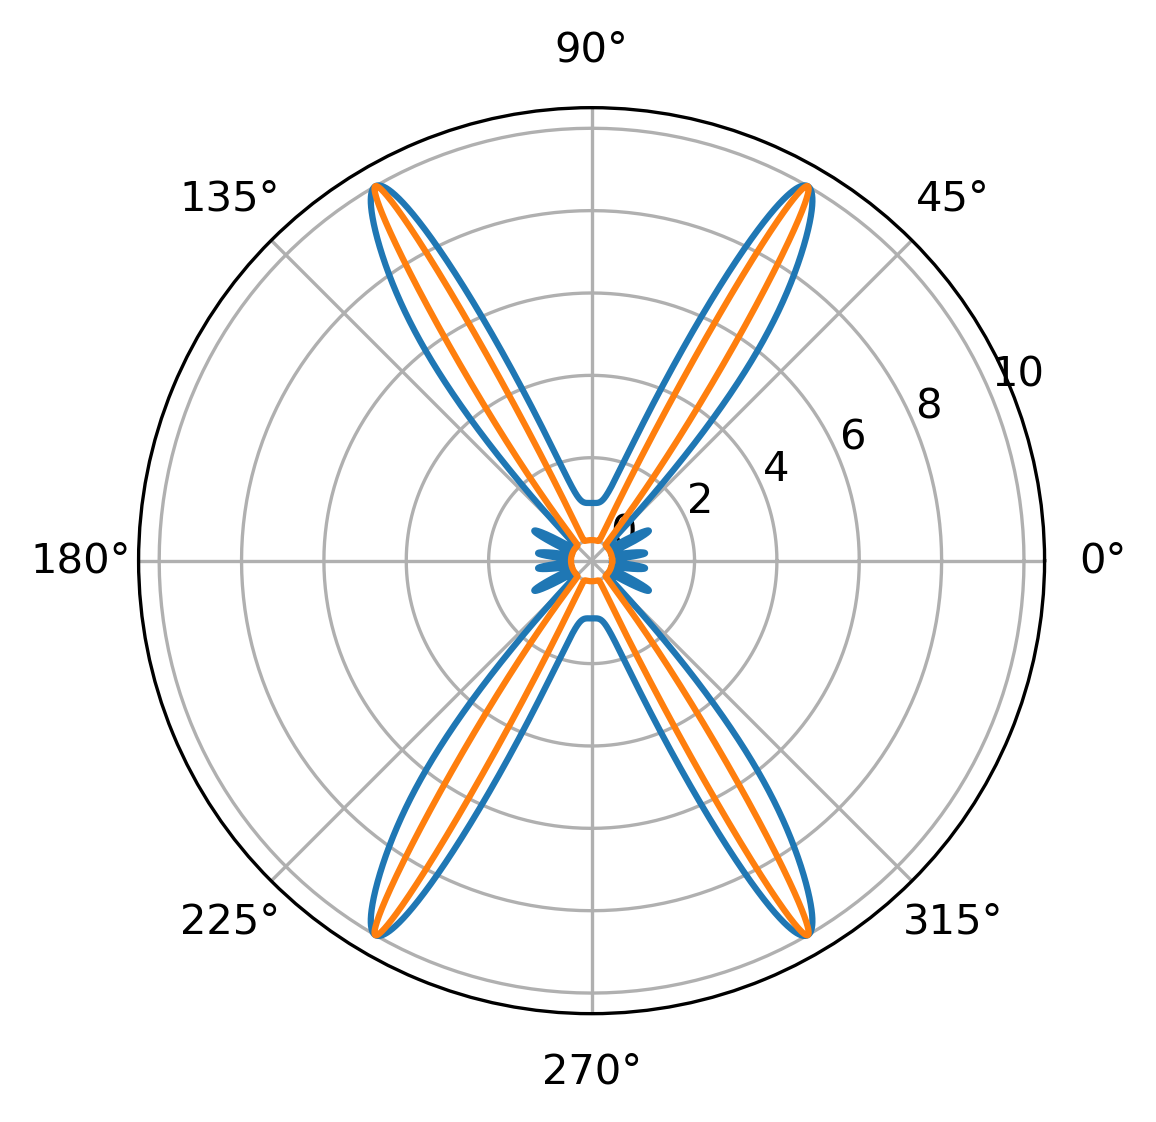

In [17]:
for j in range(len(s_k)) :
    res1 = [b1(calc_coeffs(θ[i],N,s_k[j],λ)) for i in range(num_points)]
    res2 = [b2(calc_coeffs(θ[i],N,s_k[j],λ)) for i in range(num_points)]
    mask1 = np.array(res1) <= practically_zero_dB
    mask2 = np.array(res2) <= practically_zero_dB
    perc1 = sum(mask1)/num_points*100
    perc2 = sum(mask2)/num_points*100
    print(f'{perc1}% of angles are less than or equal to {practically_zero_dB} in beam 1.')
    print(f'{perc2}% of angles are less than or equal to {practically_zero_dB} in beam 2.')
    plt.polar(θ,res1)
    plt.polar(θ,res2)
    plt.show()